# Aquisição dos dados dos sensores S1 e S2

## Carregar bibliotecas

In [55]:
from pyfirmata import Arduino, util
import time

import numpy as np


## Configurações

In [56]:
# Porta COM #### AJUSTAR porta ####
board = Arduino('COM5')

iterator = util.Iterator(board)
iterator.start()

# Entradas analógicas
T_S1 = board.get_pin('a:0:i') # A0
T_S2 = board.get_pin('a:1:i') # A1

# Saídas PWM
S1 = board.get_pin('d:10:p')  # Pino 10
S2 = board.get_pin('d:9:p')   # Pino 9

time.sleep(1)


## Funções 

In [57]:
# Função de conversão ADC - Temperatura
def TEMP(val):
    return (val*5000.0-500.0)/10.0

# Funções temperaturas
def T1():
    return TEMP(T_S1.read())

def T2():
    return TEMP(T_S2.read())


## Aquisição dos dados

In [58]:
# Resposta ao degrau  #### AJUSTAR para S1 ou S2 ####
Ts = 1       # período de amostragem

tf = 600.0    # tempo final 

n = int(np.round(tf/Ts+1))  # número de amostras
temp1 = np.zeros(n)         # vetor para temperatura
t = np.linspace(0,n-1,n)*Ts # vetor de tempo

# Entrada de controlo 
u = 50 # 50% PWM
u1 = np.ones(n)*u
print(' t,    u,    T1)')

# Ativar a saída do Arduino conforme a entrada de controlo
S1.write(u/100)

# Ler temperatura do sistema e guardar no vetor  
for i in range(n):
    # ler temperatura
    temp1[i] = T1()
    if i%10 == 0:
        #print(str(t[i])+'   '+str(u1[i])+'   '+str(temp1[i]))
        print(f'{t[i]:3.1f},{u1[i]:3.1f},{temp1[i]:3.1f}')
    time.sleep(Ts)
    
# Desligar sistema
S1.write(0.0)
board.exit() # terminar comunicação com placa


 t,    u,    T1)
0.0,50.0,27.7
10.0,50.0,28.7
20.0,50.0,31.1
30.0,50.0,33.1
40.0,50.0,35.5
50.0,50.0,37.5
60.0,50.0,39.0
70.0,50.0,40.9
80.0,50.0,42.9
90.0,50.0,43.9
100.0,50.0,44.8
110.0,50.0,45.8
120.0,50.0,46.8
130.0,50.0,47.2
140.0,50.0,48.2
150.0,50.0,48.8
160.0,50.0,48.8
170.0,50.0,49.7
180.0,50.0,50.2
190.0,50.0,50.7
200.0,50.0,50.7
210.0,50.0,51.1
220.0,50.0,52.1
230.0,50.0,52.1
240.0,50.0,52.6
250.0,50.0,52.6
260.0,50.0,53.6
270.0,50.0,53.6
280.0,50.0,54.1
290.0,50.0,54.6
300.0,50.0,54.1
310.0,50.0,54.6
320.0,50.0,54.6
330.0,50.0,55.1
340.0,50.0,55.1
350.0,50.0,55.5
360.0,50.0,55.5
370.0,50.0,55.1
380.0,50.0,55.5
390.0,50.0,56.0
400.0,50.0,56.0
410.0,50.0,56.0
420.0,50.0,56.0
430.0,50.0,56.0
440.0,50.0,56.0
450.0,50.0,56.0
460.0,50.0,56.0
470.0,50.0,56.0
480.0,50.0,56.0
490.0,50.0,56.0
500.0,50.0,56.0
510.0,50.0,56.0
520.0,50.0,56.0
530.0,50.0,56.0
540.0,50.0,56.0
550.0,50.0,56.0
560.0,50.0,56.0
570.0,50.0,56.0
580.0,50.0,56.0
590.0,50.0,56.0
600.0,50.0,56.0


## Visualizar dados

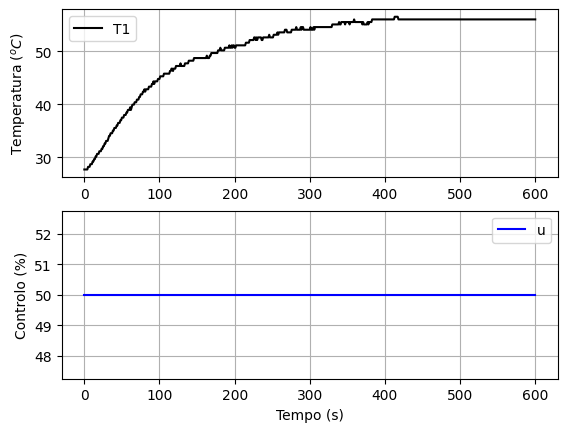

In [59]:
# Carregar biblioteca para visualização
import matplotlib.pyplot as plt

# Gráficos #### AJUSTAR para S1 ou S2 ####
plt.figure()

# Saída
ax = plt.subplot(2,1,1)
ax.grid()
plt.plot(t,temp1,'k-',label='T1')
plt.ylabel('Temperatura ($^oC$)')
plt.legend(loc='best')

# Entrada
ax = plt.subplot(2,1,2)
ax.grid()
plt.plot(t,u1,'b-',label='u')
plt.ylabel('Controlo (%)')
plt.xlabel('Tempo (s)')
plt.legend()

# Guardar gráficos num ficheiro .png
plt.savefig('degrau_S1.png')
plt.show()


## Guardar dados em ficheiro

In [60]:
# Guardar os dados num ficheiro de texto #### AJUSTAR para S1 ou S2 ####
dados = np.vstack((t,u1,temp1)).T
np.savetxt('dados_S1.txt',dados,delimiter=',',\
           header='t,u,T1',comments='')
